<h2> DATA ANALYSIS FOR BIKE-SHARE COMPANY </h2> 

Analyzing over 5.5 million rows of bike-sharing data on customers from Company.

**Objective:** Use data to determine how different customer groups use service (the different bikes).

**Data Source:** Company-owned and collected (Primary data)


<clear>

### Import Packages

In [3]:
import pandas as pd
import numpy as np
import glob
from datetime import datetime
import matplotlib.pyplot as plt

### Use *Glob* module to get and return multiple csv files 

In [4]:
# Read in multiple csv files

files_21 = sorted(glob.glob('Company Data/2021**tripdata.csv'))

files_21

['Company Data/202101tripdata.csv',
 'Company Data/202102tripdata.csv',
 'Company Data/202103tripdata.csv',
 'Company Data/202104tripdata.csv',
 'Company Data/202105tripdata.csv',
 'Company Data/202106tripdata.csv',
 'Company Data/202107tripdata.csv',
 'Company Data/202108tripdata.csv',
 'Company Data/202109tripdata.csv',
 'Company Data/202110tripdata.csv',
 'Company Data/202111tripdata.csv',
 'Company Data/202112tripdata.csv']

In [5]:
# Create dataframe for one set of csv files

data = pd.concat((pd.read_csv(file) for file in files_21), ignore_index=True)

In [6]:
# Check dimensions to confirm final dataframe

data.shape

(5595063, 13)

In [7]:
data.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,E19E6F1B8D4C42ED,electric_bike,2021-01-23 16:14:19,2021-01-23 16:24:44,California Ave & Cortez St,17660,NaN,NaN,41.900341,-87.696743,41.89,-87.72,member
1,DC88F20C2C55F27F,electric_bike,2021-01-27 18:43:08,2021-01-27 18:47:12,California Ave & Cortez St,17660,NaN,NaN,41.900333,-87.696707,41.90,-87.69,member
2,EC45C94683FE3F27,electric_bike,2021-01-21 22:35:54,2021-01-21 22:37:14,California Ave & Cortez St,17660,NaN,NaN,41.900313,-87.696643,41.90,-87.70,member
3,4FA453A75AE377DB,electric_bike,2021-01-07 13:31:13,2021-01-07 13:42:55,California Ave & Cortez St,17660,NaN,NaN,41.900399,-87.696662,41.92,-87.69,member
4,BE5E8EB4E7263A0B,electric_bike,2021-01-23 02:24:02,2021-01-23 02:24:45,California Ave & Cortez St,17660,NaN,NaN,41.900326,-87.696697,41.90,-87.70,casual


In [8]:
# Concatenate both dataframes to create one main dataframe

df = data.copy()

<clear>

In [9]:
df.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,E19E6F1B8D4C42ED,electric_bike,2021-01-23 16:14:19,2021-01-23 16:24:44,California Ave & Cortez St,17660,NaN,NaN,41.900341,-87.696743,41.89,-87.72,member
1,DC88F20C2C55F27F,electric_bike,2021-01-27 18:43:08,2021-01-27 18:47:12,California Ave & Cortez St,17660,NaN,NaN,41.900333,-87.696707,41.90,-87.69,member
2,EC45C94683FE3F27,electric_bike,2021-01-21 22:35:54,2021-01-21 22:37:14,California Ave & Cortez St,17660,NaN,NaN,41.900313,-87.696643,41.90,-87.70,member
3,4FA453A75AE377DB,electric_bike,2021-01-07 13:31:13,2021-01-07 13:42:55,California Ave & Cortez St,17660,NaN,NaN,41.900399,-87.696662,41.92,-87.69,member
4,BE5E8EB4E7263A0B,electric_bike,2021-01-23 02:24:02,2021-01-23 02:24:45,California Ave & Cortez St,17660,NaN,NaN,41.900326,-87.696697,41.90,-87.70,casual


In [10]:
df.tail()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
5595058,847431F3D5353AB7,electric_bike,2021-12-12 13:36:55,2021-12-12 13:56:08,Canal St & Madison St,13341,NaN,NaN,41.882289,-87.639752,41.890000,-87.610000,casual
5595059,CF407BBC3B9FAD63,electric_bike,2021-12-06 19:37:50,2021-12-06 19:44:51,Canal St & Madison St,13341,Kingsbury St & Kinzie St,KA1503000043,41.882123,-87.640053,41.889106,-87.638862,member
5595060,60BB69EBF5440E92,electric_bike,2021-12-02 08:57:04,2021-12-02 09:05:21,Canal St & Madison St,13341,Dearborn St & Monroe St,TA1305000006,41.881956,-87.639955,41.880254,-87.629603,member
5595061,C414F654A28635B8,electric_bike,2021-12-13 09:00:26,2021-12-13 09:14:39,Lawndale Ave & 16th St,362.0,NaN,NaN,41.860000,-87.720000,41.850000,-87.710000,member
5595062,37AC57E34B2E7E97,classic_bike,2021-12-13 08:45:32,2021-12-13 08:49:09,Michigan Ave & Jackson Blvd,TA1309000002,Dearborn St & Monroe St,TA1305000006,41.877850,-87.624080,41.881320,-87.629521,member


<clear>

### Data Overview

In [11]:
# General information on the dataframe

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5595063 entries, 0 to 5595062
Data columns (total 13 columns):
 #   Column              Dtype  
---  ------              -----  
 0   ride_id             object 
 1   rideable_type       object 
 2   started_at          object 
 3   ended_at            object 
 4   start_station_name  object 
 5   start_station_id    object 
 6   end_station_name    object 
 7   end_station_id      object 
 8   start_lat           float64
 9   start_lng           float64
 10  end_lat             float64
 11  end_lng             float64
 12  member_casual       object 
dtypes: float64(4), object(9)
memory usage: 554.9+ MB


In [12]:
# Number of missing values in each column

df.isnull().sum()

ride_id                    0
rideable_type              0
started_at                 0
ended_at                   0
start_station_name    690809
start_station_id      690806
end_station_name      739170
end_station_id        739170
start_lat                  0
start_lng                  0
end_lat                 4771
end_lng                 4771
member_casual              0
dtype: int64

In [13]:
# Number of missing values collectively

df.isnull().sum().sum()

2869497

In [14]:
# The number of unique values in each column

df.nunique()

ride_id               5595063
rideable_type               3
started_at            4677998
ended_at              4671372
start_station_name        847
start_station_id          834
end_station_name          844
end_station_id            832
start_lat              394205
start_lng              374003
end_lat                445033
end_lng                405226
member_casual               2
dtype: int64

<clear>

### Data Cleaning

In [15]:
# Drop columns that won't be necessary for analysis

df.drop(['start_lat', 'start_lng', 'end_lat', 'end_lng'], axis=1, inplace=True)

In [16]:
df.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,member_casual
0,E19E6F1B8D4C42ED,electric_bike,2021-01-23 16:14:19,2021-01-23 16:24:44,California Ave & Cortez St,17660,NaN,NaN,member
1,DC88F20C2C55F27F,electric_bike,2021-01-27 18:43:08,2021-01-27 18:47:12,California Ave & Cortez St,17660,NaN,NaN,member
2,EC45C94683FE3F27,electric_bike,2021-01-21 22:35:54,2021-01-21 22:37:14,California Ave & Cortez St,17660,NaN,NaN,member
3,4FA453A75AE377DB,electric_bike,2021-01-07 13:31:13,2021-01-07 13:42:55,California Ave & Cortez St,17660,NaN,NaN,member
4,BE5E8EB4E7263A0B,electric_bike,2021-01-23 02:24:02,2021-01-23 02:24:45,California Ave & Cortez St,17660,NaN,NaN,casual


In [17]:
# Convert 'started_at' and 'ended_at' columns to datetime data type

df['started_at'] = pd.to_datetime(df['started_at'])
df['ended_at'] = pd.to_datetime(df['ended_at'])

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5595063 entries, 0 to 5595062
Data columns (total 9 columns):
 #   Column              Dtype         
---  ------              -----         
 0   ride_id             object        
 1   rideable_type       object        
 2   started_at          datetime64[ns]
 3   ended_at            datetime64[ns]
 4   start_station_name  object        
 5   start_station_id    object        
 6   end_station_name    object        
 7   end_station_id      object        
 8   member_casual       object        
dtypes: datetime64[ns](2), object(7)
memory usage: 384.2+ MB


In [38]:
# Create column showing the time difference in minutes from the begingging of the ride to the end.

df['ride_length_mins'] = (df['ended_at'] - df['started_at']).abs() / pd.Timedelta(minutes=1)

In [39]:
df.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,member_casual,ride_length_mins,day_of_wk
0,E19E6F1B8D4C42ED,electric_bike,2021-01-23 16:14:19,2021-01-23 16:24:44,California Ave & Cortez St,17660,NaN,NaN,member,10.416667,5
1,DC88F20C2C55F27F,electric_bike,2021-01-27 18:43:08,2021-01-27 18:47:12,California Ave & Cortez St,17660,NaN,NaN,member,4.066667,2
2,EC45C94683FE3F27,electric_bike,2021-01-21 22:35:54,2021-01-21 22:37:14,California Ave & Cortez St,17660,NaN,NaN,member,1.333333,3
3,4FA453A75AE377DB,electric_bike,2021-01-07 13:31:13,2021-01-07 13:42:55,California Ave & Cortez St,17660,NaN,NaN,member,11.700000,3
4,BE5E8EB4E7263A0B,electric_bike,2021-01-23 02:24:02,2021-01-23 02:24:45,California Ave & Cortez St,17660,NaN,NaN,casual,0.716667,5


In [40]:
df.tail()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,member_casual,ride_length_mins,day_of_wk
5595058,847431F3D5353AB7,electric_bike,2021-12-12 13:36:55,2021-12-12 13:56:08,Canal St & Madison St,13341,NaN,NaN,casual,19.216667,6
5595059,CF407BBC3B9FAD63,electric_bike,2021-12-06 19:37:50,2021-12-06 19:44:51,Canal St & Madison St,13341,Kingsbury St & Kinzie St,KA1503000043,member,7.016667,0
5595060,60BB69EBF5440E92,electric_bike,2021-12-02 08:57:04,2021-12-02 09:05:21,Canal St & Madison St,13341,Dearborn St & Monroe St,TA1305000006,member,8.283333,3
5595061,C414F654A28635B8,electric_bike,2021-12-13 09:00:26,2021-12-13 09:14:39,Lawndale Ave & 16th St,362.0,NaN,NaN,member,14.216667,0
5595062,37AC57E34B2E7E97,classic_bike,2021-12-13 08:45:32,2021-12-13 08:49:09,Michigan Ave & Jackson Blvd,TA1309000002,Dearborn St & Monroe St,TA1305000006,member,3.616667,0


In [41]:
# Create 'day_of_wk' column that shows what day of the week a ride started on; # 0 = Monday and 6 = Sunday

df['day_of_wk'] = df['started_at'].dt.dayofweek

In [42]:
df.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,member_casual,ride_length_mins,day_of_wk
0,E19E6F1B8D4C42ED,electric_bike,2021-01-23 16:14:19,2021-01-23 16:24:44,California Ave & Cortez St,17660,NaN,NaN,member,10.416667,5
1,DC88F20C2C55F27F,electric_bike,2021-01-27 18:43:08,2021-01-27 18:47:12,California Ave & Cortez St,17660,NaN,NaN,member,4.066667,2
2,EC45C94683FE3F27,electric_bike,2021-01-21 22:35:54,2021-01-21 22:37:14,California Ave & Cortez St,17660,NaN,NaN,member,1.333333,3
3,4FA453A75AE377DB,electric_bike,2021-01-07 13:31:13,2021-01-07 13:42:55,California Ave & Cortez St,17660,NaN,NaN,member,11.700000,3
4,BE5E8EB4E7263A0B,electric_bike,2021-01-23 02:24:02,2021-01-23 02:24:45,California Ave & Cortez St,17660,NaN,NaN,casual,0.716667,5


In [43]:
df['day_of_wk'].dtype

dtype('int64')

<clear>

### Aanlysis

**Objective:** Use data to determine how different customer groups use the company's service (the different bikes).

In [25]:
mmbrshp_grp = df.groupby(['member_casual'])

In [26]:
# Seeing how many rides each customer group made within the different bike categories

mmbrshp_grp_ridetype = mmbrshp_grp['rideable_type'].value_counts().to_frame('rides')

mmbrshp_grp_ridetype

rides
member_casual rideable_type         
casual        classic_bike   1266657
              electric_bike   950006
              docked_bike     312342
member        classic_bike   1984371
              electric_bike  1081686
              docked_bike          1

<AxesSubplot:title={'center':'Number of Rides in 2021'}, xlabel='Membership Type', ylabel='Number of Rides'>

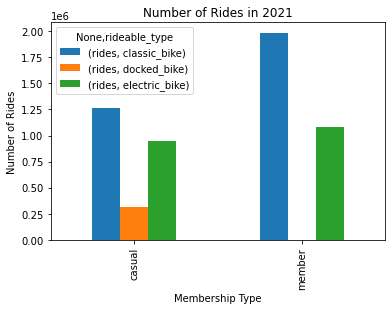

In [27]:

mmbrshp_grp_ridetype.unstack(fill_value=0).plot.bar(xlabel='Membership Type', ylabel='Number of Rides', title='Number of Rides in 2021')


***- Annual-member customers rode 22% (717,714) more classic bikes than casual-rider customers.***

***- Annual-member customers rode 6% (131,680) more electric bikes than casual-rider customers.***

In [44]:
# Check the cumulative amount of time different customer groups used service from Jan. 2021 - Dec. 2021

grouped_time = mmbrshp_grp['ride_length_mins'].sum()

grouped_time.to_frame()

,ride_length_mins
member_casual,
casual,8.093317e+07
member,4.180102e+07


In [45]:
ride_diff = 80930560 - 41799080
ride_diff

39131480

In [46]:
ride_diff / 60    #'60' representing 60 minutes; to get the time difference in hours

652191.3333333334

##### Collectively, casual-rider customers have ridden 652,191.33 hours more than annual-member riders in 2021.

In [31]:
# Check the distributed number of rides each month from Jan. 2021 - Dec. 2021

started_month = df.groupby([df['started_at'].dt.month.rename('month')])

In [32]:
started_month['rideable_type'].value_counts().to_frame('rides')

rides
month rideable_type        
1     classic_bike    61700
      electric_bike   33028
      docked_bike      2106
2     classic_bike    35012
      electric_bike   13339
      docked_bike      1271
3     classic_bike   152545
      electric_bike   60294
      docked_bike     15657
4     classic_bike   214619
      electric_bike   97897
      docked_bike     24714
5     classic_bike   309093
      electric_bike  179187
      docked_bike     43353
6     classic_bike   435020
      electric_bike  242859
      docked_bike     51716
7     classic_bike   506909
      electric_bike  257803
      docked_bike     57698
8     classic_bike   503033
      electric_bike  256254
      docked_bike     45065
9     classic_bike   462284
      electric_bike  258526
      docked_bike     35337
10    classic_bike   316139
      electric_bike  292203
      docked_bike     22884
11    electric_bike  198325
      classic_bike   154039
      docked_bike      7614
12    electric_bike  141977
      classic_bike   100635
      docked_bike      4928

In [47]:
mmbrshp_grp['ride_length_mins'].describe()

,count,mean,std,min,25%,50%,75%,max
member_casual,,,,,,,,
casual,2529005.0,32.001982,263.143828,0.0,9.066667,15.966667,29.283333,55944.150000
member,3066058.0,13.633475,27.705492,0.0,5.566667,9.600000,16.600000,1559.933333


***-The average ride for an annual-member customer was 13 minutes while the average ride for a causual-rider customer was 32 minutes.***

In [50]:
df.groupby(['day_of_wk', 'member_casual']).sum()

ride_length_mins
day_of_wk member_casual                  
0         casual             9.128270e+06
          member             5.513675e+06
1         casual             7.675275e+06
          member             5.952992e+06
2         casual             7.714950e+06
          member             6.116795e+06
3         casual             7.924905e+06
          member             5.768704e+06
4         casual             1.104917e+07
          member             5.948553e+06
5         casual             1.936587e+07
          member             6.610187e+06
6         casual             1.807473e+07
          member             5.890117e+06

***- More rides occurred on Friday, Saturday, and Sunday than any other days of the week in 2021.***

***- The most rides occurred on Saturdays and by casual-rider customers in 2021.***